# Building a Logistic Regression

Create a logistic regression based on the bank data provided. 

The data is based on the marketing campaign efforts of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Note that the first column of the dataset is the index.

Source: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014


## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

## Load the data

Load the ‘Example_bank_data.csv’ dataset.

In [3]:
raw_data = pd.read_csv('Bank_data.csv')

We want to know whether the bank marketing strategy was successful, so we need to transform the outcome variable into 0s and 1s in order to perform a logistic regression.

In [4]:
raw_data.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [5]:
data = raw_data.copy()
data['y'] = data['y'].map({'no':0, 'yes':1})
data.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4,4.856,0.0,1.0,0.0,0.0,157.0,0


### Declare the dependent and independent variables

In [8]:
y = data['y']
x1 = data.drop(['y'], axis=1)
x1

,Unnamed: 0,interest_rate,credit,march,may,previous,duration
0,0,1.334,0.0,1.0,0.0,0.0,117.0
1,1,0.767,0.0,0.0,2.0,1.0,274.0
2,2,4.858,0.0,1.0,0.0,0.0,167.0
3,3,4.120,0.0,0.0,0.0,0.0,686.0
4,4,4.856,0.0,1.0,0.0,0.0,157.0
...,...,...,...,...,...,...,...
513,513,1.334,0.0,1.0,0.0,0.0,204.0
514,514,0.861,0.0,0.0,2.0,1.0,806.0
515,515,0.879,0.0,0.0,0.0,0.0,290.0
516,516,0.877,0.0,0.0,5.0,1.0,473.0


In [9]:
x = sm.add_constant(x1)

### Simple Logistic Regression

Run the regression and visualize it on a scatter plot (no need to plot the line).

In [10]:
reg = sm.Logit(y,x)
result = reg.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.335737
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      510
Method:                           MLE   Df Model:                            7
Date:                Wed, 18 Oct 2023   Pseudo R-squ.:                  0.5156
Time:                        17:27:18   Log-Likelihood:                -173.91
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.602e-76
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0347      0.408     -0.085      0.932      -0.834       0.764
Unnamed: 0       -0.0004      0.001     -0.461      0.645      -0.002       0.001
interest_rate    -0.7790      0.092     -8.463      0.000      -0.959      -0.599
credit            2.3701      1.091      2.172      0.030       0.231       4.509
march            -1.8120      0.331     -5.468      0.000      -2.461      -1.163
may               0.1918      0.229      0.836      0.403      -0.258       0.641
previous          1.2795      0.585      2.188      0.029       0.133       2.426
duration          0.0070      0.001      9.396      0.000       0.006       0.008
=================================================================================
"""

ValueError: x and y must be the same size

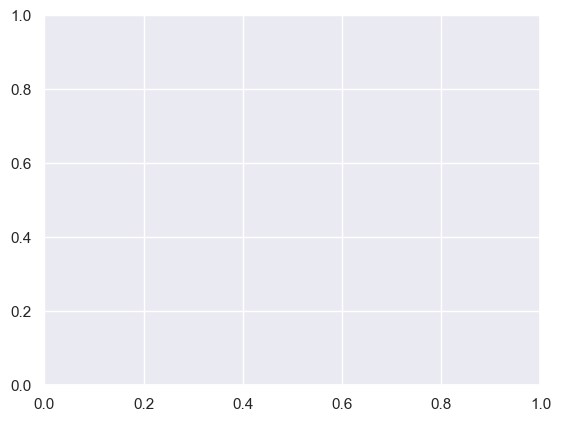

In [12]:
plt.scatter(y,x)
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.show()